
Linear Regression Evaluation:
MAE: 0.004386796427480563, MSE: 4.271948818435761e-05, RMSE: 0.006536014701969206, R²: 0.6118599094318875


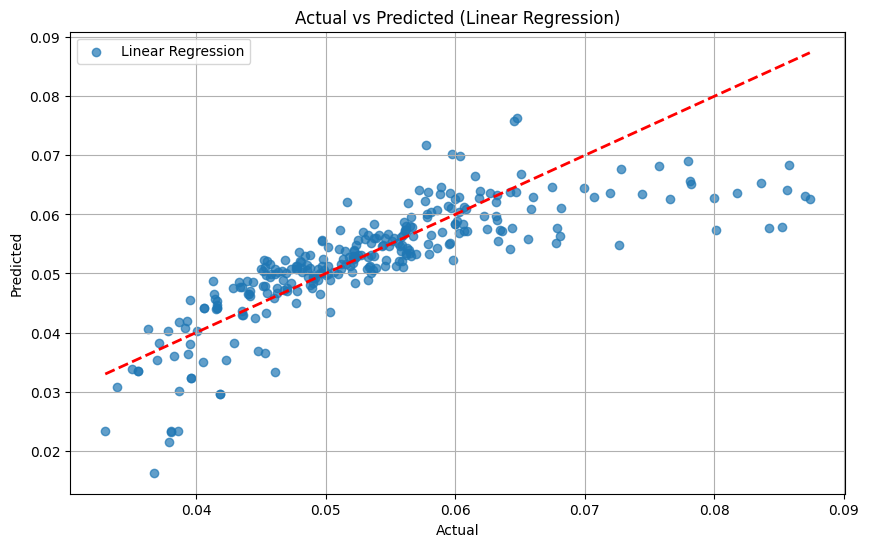


K-Nearest Neighbors Evaluation:
MAE: 0.0021404877045606823, MSE: 8.96487696679123e-06, RMSE: 0.0029941404387221434, R²: 0.91854705414995


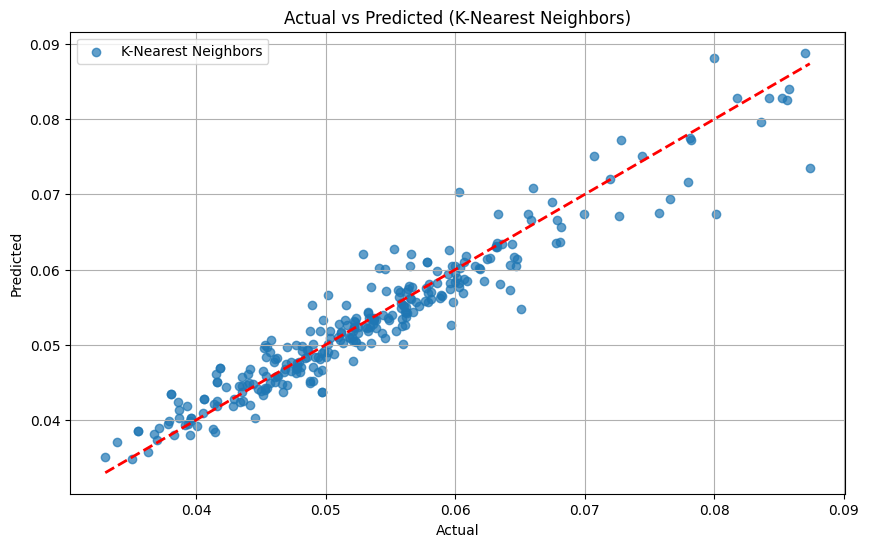


Decision Tree Evaluation:
MAE: 0.0029945633360916285, MSE: 1.6954514700506537e-05, RMSE: 0.004117586028306699, R²: 0.8459549224233769


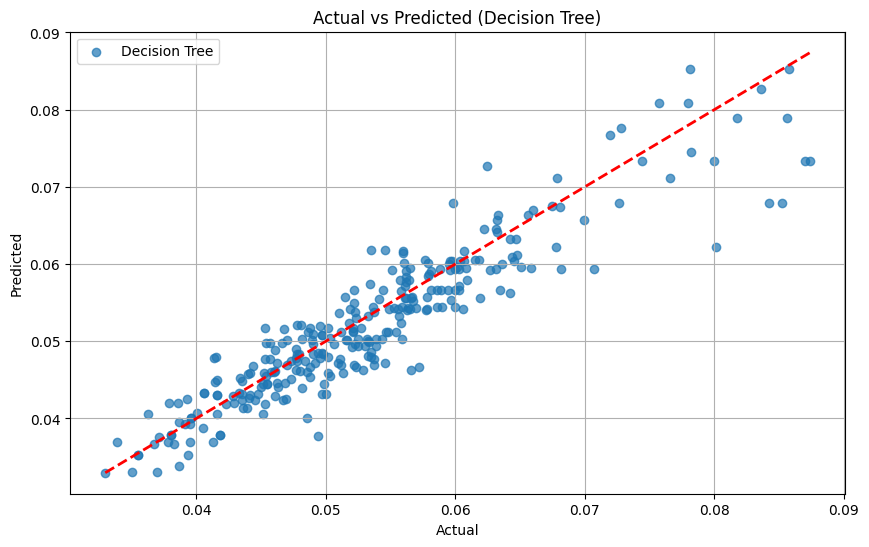


Random Forest Evaluation:
MAE: 0.0019865410771406932, MSE: 9.782758919187716e-06, RMSE: 0.003127740225656171, R²: 0.9111159544675939


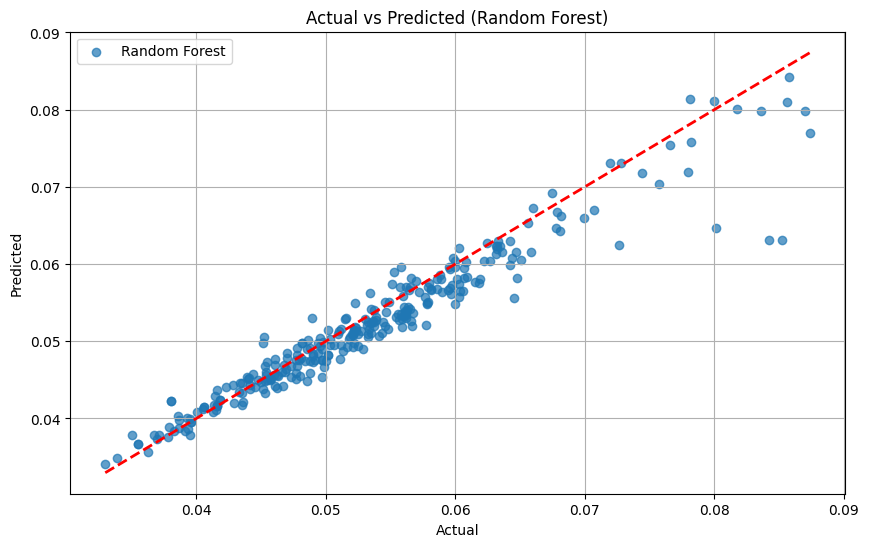

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Đọc dữ liệu
file_path = "dataset/Data_final.xlsx"
data = pd.read_excel(file_path)

# Mã hóa dữ liệu dạng chuỗi
def encode_data(data):
    label_encoders = {}
    for column in data.select_dtypes(include=['object']).columns:
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
        label_encoders[column] = le
    return data, label_encoders

# Chuẩn hóa dữ liệu
def scale_data(data):
    scaler = StandardScaler()
    return pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

# Tạo cột mục tiêu (Tỉ lệ bác sĩ trên dân số)
def create_target_column(data):
    data["Số giáo viên"] = data["Số giáo viên tiểu học"] + data["Số giáo viên thcs"] + data["Số giáo viên thpt"]
    data["Số học sinh"] = data["Số học sinh tiểu học"] + data["Số học sinh thcs"] + data["Số học sinh thpt"]
    data["Tỉ lệ giáo viên trên học sinh"] = data["Số giáo viên"] / data["Số học sinh"]
    return data

# Hàm đánh giá mô hình và vẽ biểu đồ
def evaluate_and_plot(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"\n{model_name} Evaluation:")
    print(f"MAE: {mae}, MSE: {mse}, RMSE: {rmse}, R²: {r2}")

    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.7, label=model_name)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
    plt.title(f"Actual vs Predicted ({model_name})")
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.legend()
    plt.grid(True)
    plt.show()

# Chuẩn bị dữ liệu
data, label_encoders = encode_data(data)
data = create_target_column(data)

# Chọn các đặc trưng và mục tiêu
features = ["Dân số", "Số học sinh tiểu học", "Số học sinh thcs","Số học sinh thpt", "Số giáo viên tiểu học" ,
            "Số giáo viên thcs","Số giáo viên thpt", "Số trường thpt", "Số trường tiểu học", "Số trường thcs"]
target = "Tỉ lệ giáo viên trên học sinh"
X = data[features]
y = data[target]

# Chia dữ liệu thành train và test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None, shuffle=True)

# Chuẩn hóa dữ liệu
X_train = scale_data(X_train)
X_test = scale_data(X_test)

# Mô hình và đánh giá
models = {
    "Linear Regression": LinearRegression(),
    "K-Nearest Neighbors": KNeighborsRegressor(n_neighbors=5, weights="uniform", p=2),
    "Decision Tree": DecisionTreeRegressor(random_state=42, max_depth=20, min_samples_split=5, min_samples_leaf=2),
    "Random Forest": RandomForestRegressor(random_state=42, n_estimators=100, max_depth=20, min_samples_split=5, min_samples_leaf=2)
}

# Đánh giá và vẽ biểu đồ cho các mô hình
for model_name, model in models.items():
    evaluate_and_plot(model, X_train, X_test, y_train, y_test, model_name)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.5s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=10, min_samples

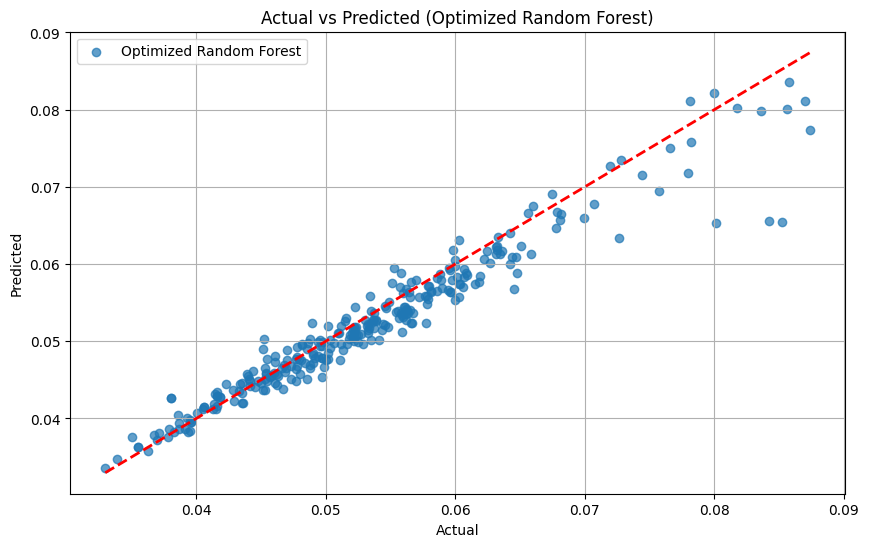

In [4]:
# Bước 4: Tối ưu mô hình Random Forest với GridSearchCV
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    scoring='r2',
    cv=5,
    verbose=2
)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

# Đánh giá mô hình tốt nhất
print("Best Model Parameters:", grid_search.best_params_)
evaluate_and_plot(best_model, X_train, X_test, y_train, y_test,"Optimized Random Forest")

# # Lưu mô hình tốt nhất
# joblib.dump(best_model, "best_rf_model.pkl")